The goal of this notebook is to take our dataset and create a zip containing the images and a csv file containing the labels in relation to the images. The labels are 4 numbers for bounding boxes.

The zip is then to be sent to google drive from where we will be able to use it inside our google colab notebook.

In [25]:
from os import path, walk
from matplotlib import pyplot as plt
from matplotlib import patches
import random as rd
from tqdm import tqdm
import pandas as pd

%run '../alprLib/PlateBoundingBox.py'

In [26]:
DATASET_PATH = "../eu_dataset"
ANNOTATIONS_PATH = path.join(DATASET_PATH, "annots")
IMAGES_PATH = path.join(DATASET_PATH, "images")

Image shape: (720, 1280, 4)


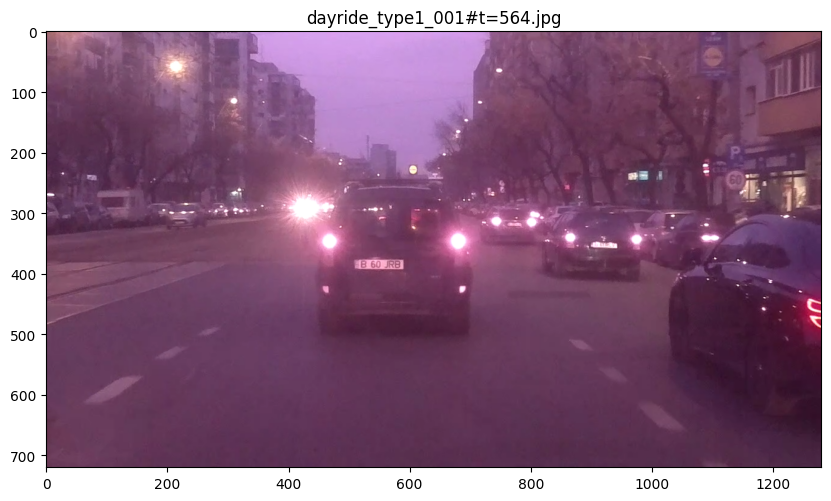

In [33]:
image_filenames = list(walk(IMAGES_PATH))
image_filename = rd.choice(image_filenames[0][2])
image_path = path.join(image_filenames[0][0], image_filename)
img = plt.imread(image_path)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title(image_filename)
ax.imshow(img)
print('Image shape: {}'.format(img.shape))

In [34]:
annotation = image_filename.split('.')[0] + '.xml'
annotation_path = path.join(ANNOTATIONS_PATH, annotation)
print('Annotation path: {}'.format(annotation_path))

with open(annotation_path, 'r') as f:
    print(f.read())


Annotation path: ../eu_dataset/annots/dayride_type1_001#t=564.xml
<annotation verified="yes">
    <folder>Annotation</folder>
    <filename>dayride_type1_001.mp4#t=564.jpg</filename>
    <path>license-plate-detector-PascalVOC-export/Annotations/dayride_type1_001.mp4#t=564.jpg</path>
    <source>
        <database>Unknown</database>
    </source>
    <size>
        <width>1280</width>
        <height>720</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
    <name>license-plate</name>
    <pose>Unspecified</pose>
    <truncated>0</truncated>
    <difficult>0</difficult>
    <bndbox>
        <xmin>506.98424894352667</xmin>
        <ymin>373.7704918032787</ymin>
        <xmax>595.0057625816365</xmax>
        <ymax>397.37704918032784</ymax>
    </bndbox>
</object>
</annotation>



In [35]:
plates = PlateBoundingBox.load_from_xml(annotation_path)
for plate in plates:
    plate.describe()

PlateBoundingBox
xmin: 506
ymin: 373
xmax: 595
ymax: 397
width: 89
height: 24
width01: 0.06953125
height01: 0.03333333333333333
center01: (0.430078125, 0.5347222222222222)
center: (550.5, 385.0)
area: 2136



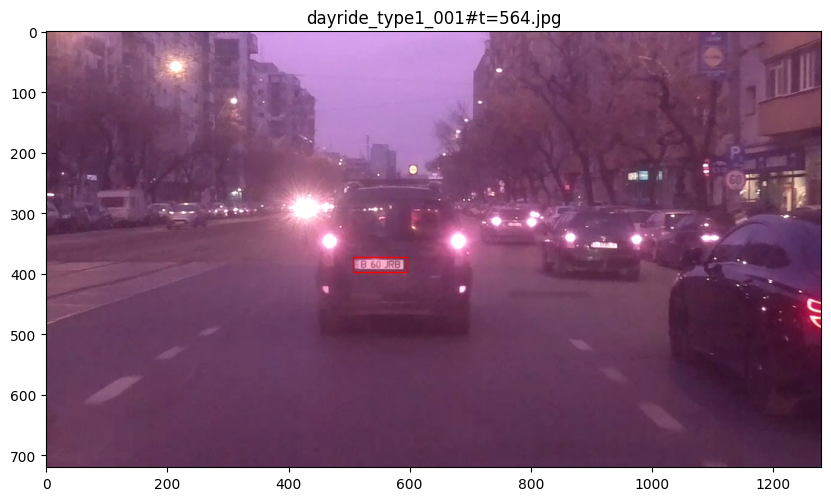

In [36]:
for plate in plates:
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_title(image_filename)
    ax.imshow(img)
    rect = patches.Rectangle((plate.xmin, plate.ymin), plate.width, plate.height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

In [31]:
# create a dataframe that holds the bounding box information for each image
df = pd.DataFrame(columns=['filename', 'w', 'h', 'xc', 'yc'])
for filename in tqdm(image_filenames[0][2]):
    annotation = filename.split('.')[0] + '.xml'
    annotation_path = path.join(ANNOTATIONS_PATH, annotation)
    plates = PlateBoundingBox.load_from_xml(annotation_path)
    for plate in plates:
        new_row = pd.DataFrame({
            'filename': filename, 
            'w': plate.width01,
            'h': plate.height01,
            'xc': plate.center01[0],
            'yc': plate.center01[1],
        }, index=[0])
        df = pd.concat([df, new_row], ignore_index=True)

df.head()

100%|██████████| 745/745 [00:00<00:00, 2003.10it/s]


,filename,w,h,xc,yc
0,dayride_type1_001#t=462.jpg,0.060156,0.026389,0.519141,0.509028
1,dayride_type1_001#t=1058.jpg,0.142187,0.062500,0.484375,0.849306
2,dayride_type1_001#t=1172.jpg,0.053125,0.026389,0.714844,0.553472
3,515 ND 70.jpg,0.089583,0.047222,0.143403,0.629167
4,dayride_type1_001#t=1392.jpg,0.149219,0.066667,0.451953,0.843056


In [32]:
# zip ./archive/images with the dataframe exported as csv

# export the dataframe as csv
df.to_csv('labels.csv', index=False)

# zip the images and the csv file (make sure all files are copied to the root of the zip file)
!zip -j dataset.zip ../eu_dataset/images_resized/* labels.csv

# remove the csv file
!rm labels.csv

  adding: 1020 HG 90.jpg (deflated 2%)
  adding: 103 YC 68.jpg (deflated 1%)
  adding: 1131 XD 29.jpg (deflated 2%)
  adding: 1218 ZD 25.jpg (deflated 3%)
  adding: 1500 WD 68.jpg (deflated 2%)
  adding: 198 GV 73.jpg (deflated 2%)
  adding: 20 CEY 44.jpg (deflated 2%)
  adding: 2330 GY 90.jpg (deflated 4%)
  adding: 2348 XR 25.jpg (deflated 3%)
  adding: 24 EZ 90.jpg (deflated 1%)
  adding: 353 ASK 35.jpg (deflated 2%)
  adding: 3608 PW 75.jpg (deflated 3%)
  adding: 3956 ZJ 68.jpg (deflated 2%)
  adding: 5122 WQ 06.jpg (deflated 1%)
  adding: 515 ND 70.jpg (deflated 2%)
  adding: 55 SG 53.jpg (deflated 1%)
  adding: 5658 YA 22.jpg (deflated 3%)
  adding: 6099 TV 66.jpg (deflated 2%)
  adding: 6176 YM 27.jpg (deflated 1%)
  adding: 6402 VH 25.jpg (deflated 3%)
  adding: 6935 XY 64.jpg (deflated 1%)
  adding: 7418 ZE 25.jpg (deflated 3%)
  adding: 7770 ZP 14.jpg (deflated 2%)
  adding: 779 PRA 75.jpg (deflated 3%)
  adding: 812 AYS 06.jpg (deflated 1%)
  adding: 8427 XX 29.jpg (deflate